## Import Libaries

In [ ]:
import pandas as pd

## Import Data

In [ ]:
data = pd.read_csv('sport_data.csv')

# Basic Data Analysis

In [ ]:
data

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball
5,18,5,Male,Basketball
6,15,3,Male,Hockey
7,13,3,Male,Hockey
8,13,4,Male,Hockey
9,13,3,Female,Soccer


In [ ]:
data.head()

,Age,Height,Sex,Sport
0,13,3,Male,Soccer
1,16,4,Male,Soccer
2,17,4,Male,Soccer
3,15,5,Male,Basketball
4,17,6,Male,Basketball


In [ ]:
data.tail()

,Age,Height,Sex,Sport
13,17,4,Female,Basketball
14,19,6,Female,Basketball
15,13,3,Female,Hockey
16,14,4,Female,Hockey
17,14,3,Female,Hockey


In [ ]:
data.shape

(18, 4)

In [ ]:
data.describe()

,Age,Height
count,18.000000,18.000000
mean,15.166667,4.000000
std,1.917412,1.028992
min,13.000000,3.000000
25%,13.250000,3.000000
50%,15.000000,4.000000
75%,16.750000,4.750000
max,19.000000,6.000000


# Pre-Process Data

In [ ]:
data['Sex'].replace(['Female', 'Male'], [0, 1], inplace=True)

In [ ]:
data.head()

,Age,Height,Sex,Sport
0,13,3,1,Soccer
1,16,4,1,Soccer
2,17,4,1,Soccer
3,15,5,1,Basketball
4,17,6,1,Basketball


In [ ]:
data.tail()

,Age,Height,Sex,Sport
13,17,4,0,Basketball
14,19,6,0,Basketball
15,13,3,0,Hockey
16,14,4,0,Hockey
17,14,3,0,Hockey


# Import Machine Learning Libraries

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns='Sport')

In [ ]:
X.head()

,Age,Height,Sex
0,13,3,1
1,16,4,1
2,17,4,1
3,15,5,1
4,17,6,1


In [ ]:
y = data.drop(columns=['Age', 'Height', 'Sex'])

In [ ]:
y.head()

,Sport
0,Soccer
1,Soccer
2,Soccer
3,Basketball
4,Basketball


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Build Machine Learning Model

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Test ML Model

In [ ]:
test = clf.predict(X_test)

In [ ]:
test

array(['Hockey', 'Hockey', 'Soccer', 'Hockey', 'Soccer', 'Basketball'],
      dtype=object)

In [ ]:
y_test

,Sport
6,Hockey
8,Hockey
13,Basketball
16,Hockey
11,Soccer
14,Basketball


# Check for Efficacy

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy = accuracy_score(y_test, test)

In [ ]:
accuracy

0.8333333333333334

# Save Model

In [ ]:
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
joblib.dump(clf, 'ml_sport_model.joblib')

['ml_sport_model.joblib']

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [ ]:
c_matrix = confusion_matrix(y_test, test)
c_matrix

array([[1, 0, 1],
       [0, 3, 0],
       [0, 0, 1]])

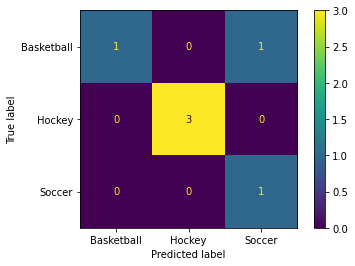

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)

In [ ]:
y_test

,Sport
6,Hockey
8,Hockey
13,Basketball
16,Hockey
11,Soccer
14,Basketball


In [ ]:
print(classification_report(y_test, test))

              precision    recall  f1-score   support

  Basketball       1.00      0.50      0.67         2
      Hockey       1.00      1.00      1.00         3
      Soccer       0.50      1.00      0.67         1

    accuracy                           0.83         6
   macro avg       0.83      0.83      0.78         6
weighted avg       0.92      0.83      0.83         6



In [ ]:
              precision    recall  f1-score   support

  Basketball       1.00      0.50      0.67         2
      Hockey       1.00      1.00      1.00         3
      Soccer       0.50      1.00      0.67         1

    accuracy                           0.83         6
   macro avg       0.83      0.83      0.78         6
weighted avg       0.92      0.83      0.83         6
